# Đồ án NHẬP MÔN HỌC MÁY ÁP DỤNG THUẬT TOÁN DECISION TREE

# Phần 1:Tiền xử lí dữ liệu

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

# Đọc dữ liệu từ file CSV
df = pd.read_csv('titanic_disaster.csv')

# Tiền xử lý dữ liệu
print("=== Tiền xử lý dữ liệu ===")

# Xử lý giá trị thiếu
df['Age'] = df['Age'].fillna(df['Age'].median())  # Điền trung vị

# Điền giá trị phổ biến nhất cho Embarked
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  

# Xử lý Fare (log-transform để giảm ảnh hưởng của giá trị lớn)
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Fare'] = np.log1p(df['Fare'])

# Chuyển đổi dữ liệu categorical thành số
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # male=1, female=0
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])  # Q=1, S=2, C=0

# Chọn các đặc trưng có ý nghĩa
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']  
X = df[features]
y = df['Survived']


# 1.3 Giải thích các giá trị cột
print("\n1.3 Giải thích các cột:")
print("- PassengerId: Mã định danh duy nhất cho mỗi hành khách")
print("- Survived: Trạng thái sống sót (0 = Không sống sót, 1 = Sống sót)")
print("- Pclass: Hạng vé (1 = thượng lưu, 2 = trung lưu, 3 = phổ thông)")
print("- Name: Tên hành khách")
print("- Sex: Giới tính (0 = female, 1 = male sau khi mã hóa)")
print("- Age: Tuổi của hành khách")
print("- SibSp: Số anh chị em/vợ chồng trên tàu")
print("- Parch: Số cha mẹ/con cái trên tàu")
print("- Ticket: Mã vé")
print("- Fare: Giá vé")
print("- Cabin: Số cabin (có nhiều giá trị thiếu)")
print("- Embarked: Cảng lên tàu (0 = C, 1 = Q, 2 = S sau khi mã hóa)")

=== Tiền xử lý dữ liệu ===

1.3 Giải thích các cột:
- PassengerId: Mã định danh duy nhất cho mỗi hành khách
- Survived: Trạng thái sống sót (0 = Không sống sót, 1 = Sống sót)
- Pclass: Hạng vé (1 = thượng lưu, 2 = trung lưu, 3 = phổ thông)
- Name: Tên hành khách
- Sex: Giới tính (0 = female, 1 = male sau khi mã hóa)
- Age: Tuổi của hành khách
- SibSp: Số anh chị em/vợ chồng trên tàu
- Parch: Số cha mẹ/con cái trên tàu
- Ticket: Mã vé
- Fare: Giá vé
- Cabin: Số cabin (có nhiều giá trị thiếu)
- Embarked: Cảng lên tàu (0 = C, 1 = Q, 2 = S sau khi mã hóa)


# Phần 2:Xây dựng mô hình

In [8]:
print("\n=== Phần 2: Xây dựng mô hình ===")

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Decision Tree
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_split=5, random_state=42)
dt_model.fit(X_train, y_train)



=== Phần 2: Xây dựng mô hình ===


DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=5,
                       random_state=42)

# Phần 3: Đánh giá và giải thích mô hình


=== Phần 3: Đánh giá và giải thích mô hình ===
Độ chính xác của mô hình: 0.81 (81.01%)

Báo cáo phân loại chi tiết:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



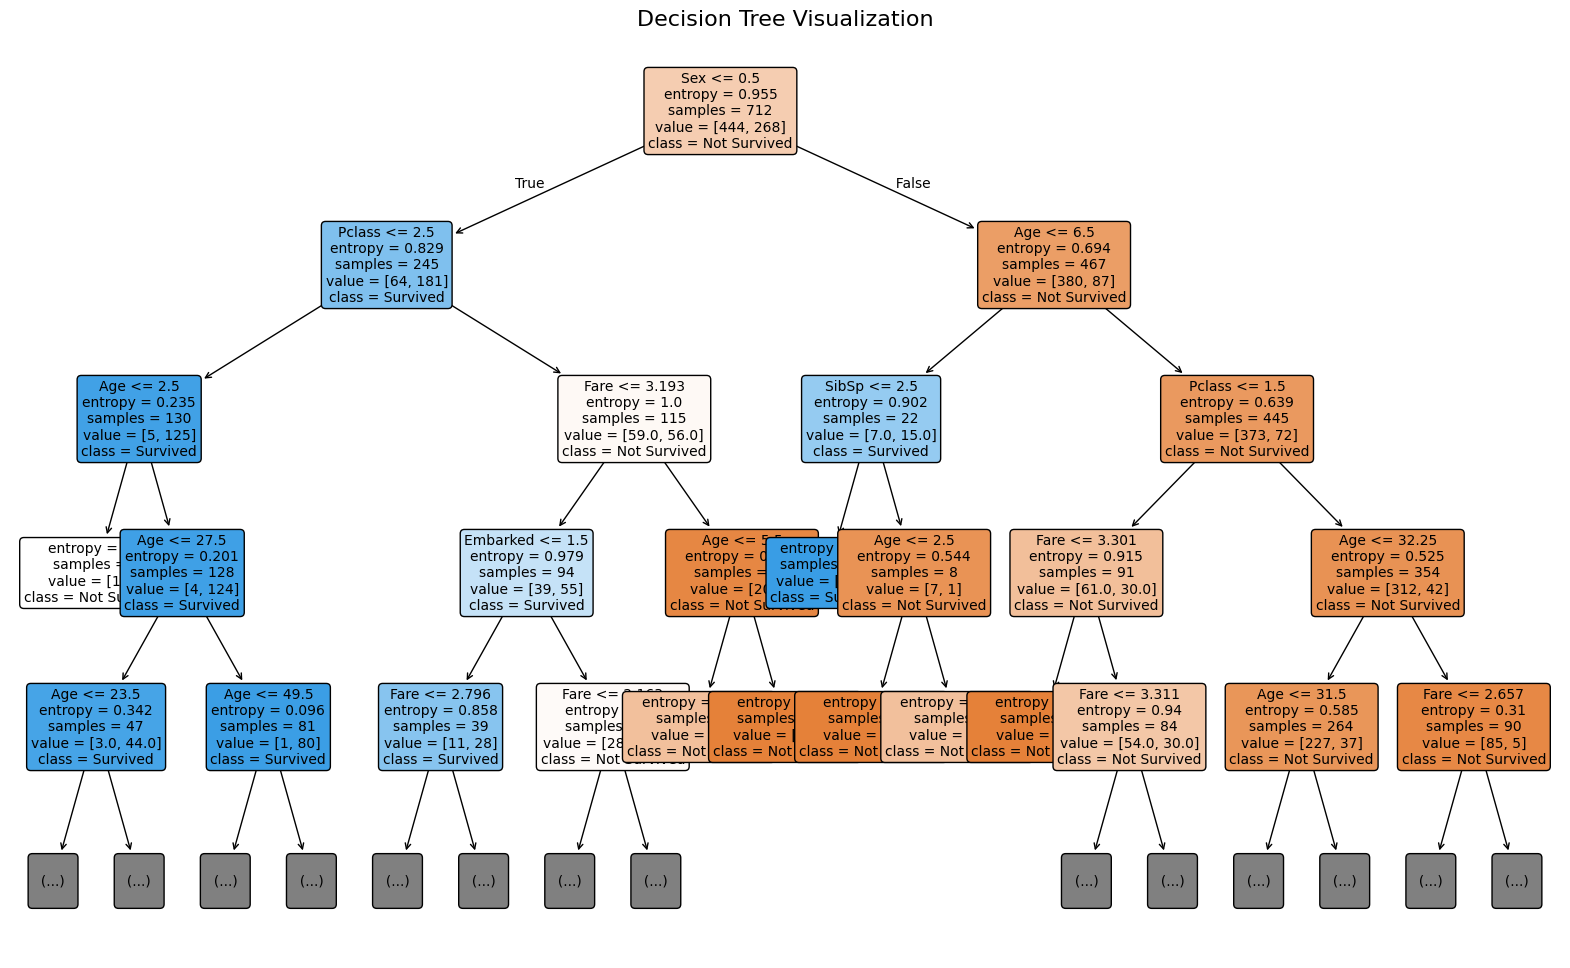

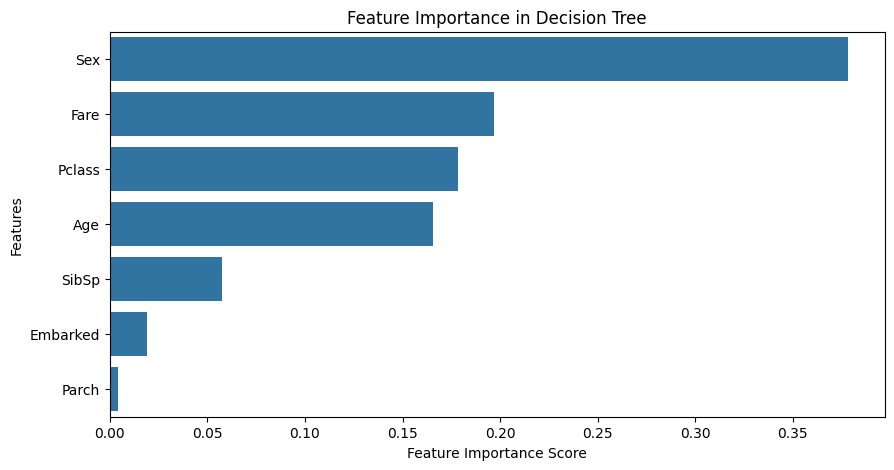

In [9]:
print("\n=== Phần 3: Đánh giá và giải thích mô hình ===")

# 3.1 Dự đoán và tính độ chính xác
# Đánh giá mô hình
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy:.2f} ({accuracy*100:.2f}%)")

# Báo cáo phân loại
print("\nBáo cáo phân loại chi tiết:")
print(classification_report(y_test, y_pred))

# Trực quan hóa cây quyết định
plt.figure(figsize=(20, 12))
tree.plot_tree(dt_model, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True, rounded=True, fontsize=10, max_depth=4)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

# Hiển thị tầm quan trọng của các đặc trưng
feature_importance = pd.Series(dt_model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.show()


# Phần 4:Áp dụng thực tế

Các cột trong dataset: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27484\2920483486.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=death_percentage.index, y=death_percentage.values, palette=['blue', 'pink'])


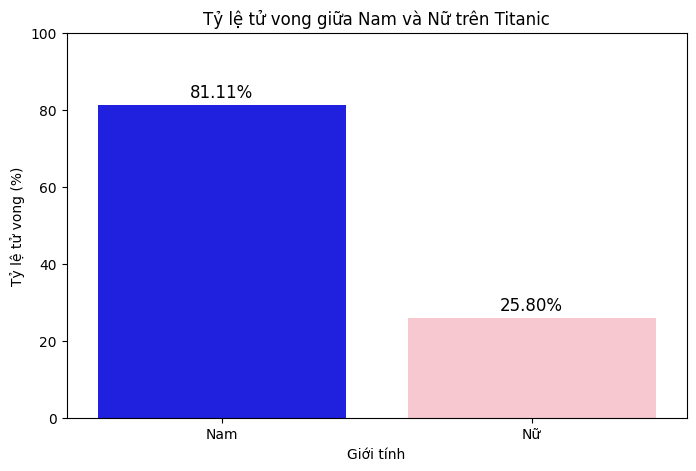

Số lượng người chết theo giới tính:
Sex
Nam    468
Nữ      81
Name: count, dtype: int64

Tỷ lệ tử vong theo giới tính (%):
Sex
Nam    81.109185
Nữ     25.796178
Name: count, dtype: float64


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv('titanic_disaster.csv')

# Kiểm tra các cột có trong dataset
print("Các cột trong dataset:", df.columns)

# Kiểm tra nếu cột 'Survived' và 'Sex' tồn tại
if 'Survived' in df.columns and 'Sex' in df.columns:
    # Chuyển đổi giới tính thành dạng số
    sex_map = {'male': 'Nam', 'female': 'Nữ'}
    df['Sex'] = df['Sex'].map(sex_map)
    
    # Loại bỏ các giá trị NaN nếu có
    df = df.dropna(subset=['Sex', 'Survived'])
    
    # Tính toán số lượng người chết theo giới tính
    death_counts = df[df['Survived'] == 0]['Sex'].value_counts()
    total_counts = df['Sex'].value_counts()
    
    # Đảm bảo có cả hai giới tính trong dữ liệu
    if 'Nam' in total_counts and 'Nữ' in total_counts:
        death_percentage = (death_counts / total_counts) * 100
        
        # Vẽ biểu đồ
        plt.figure(figsize=(8, 5))
        sns.barplot(x=death_percentage.index, y=death_percentage.values, palette=['blue', 'pink'])
        plt.xlabel("Giới tính")
        plt.ylabel("Tỷ lệ tử vong (%)")
        plt.title("Tỷ lệ tử vong giữa Nam và Nữ trên Titanic")
        plt.ylim(0, 100)
        
        # Thêm nhãn giá trị trên cột
        for i, val in enumerate(death_percentage.values):
            plt.text(i, val + 2, f"{val:.2f}%", ha='center', fontsize=12)
        
        plt.savefig('gender_mortality.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Hiển thị kết quả
        print("Số lượng người chết theo giới tính:")
        print(death_counts)
        print("\nTỷ lệ tử vong theo giới tính (%):")
        print(death_percentage)
    else:
        print("Dữ liệu không đủ để tính toán tỷ lệ tử vong giữa Nam và Nữ.")
else:
    print("Cột 'Survived' hoặc 'Sex' không tồn tại trong dữ liệu. Hãy kiểm tra lại dataset.")
